In [2]:
#importing necessary modules
import pandas as pd
import plotly.express as px
import pymssql
from shapely import wkb
import geopandas as gpd
import plotly.graph_objects as go
import numpy as np


In [3]:
#setting database connection strings
database = 'Pushing-P-DB'
table = 'dbo.NJ_Cities'
user = 'pushing_p'
password  = 't3stP@ssword'
server = 'gen10-data-fundamentals-22-02-sql-server.database.windows.net'

In [4]:
# Retrieve Training Data for Geographically Weighted Regression Model
conn = pymssql.connect(server, user, password, database)

# Query select all rows from SQL tables to insert into their respective DataFrames
query1 = f'SELECT * FROM {table}'

cities = pd.read_sql(query1, conn)

# Function convert hex string to polygon objects
def convert_to_polygon(hex):
    return wkb.loads(hex, hex=True)
cities['geometry'] = cities['geometry'].apply(convert_to_polygon)


# Convert from pandas to geopandas dataframes
df = gpd.GeoDataFrame(cities, geometry=cities['geometry'], crs = 'epsg:4269')

#converting Number of Uninsured column to intiger
# df['Number of Uninsured (2019)'] = df['Number of Uninsured (2019)'].astype('int64')

c:\Users\Luis\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [6]:
cities.head(2)

,State,County,City,Unemployment Rate (16 & Over),Median Household Income,City Population,Uninsured Population,"NUI, Under 6 years","NUI, 6-18 years","NUI, 19 to 25 years",...,"NUI, 65 years and older","NUI, Men","NUI, Women","NUI, White","NUI, African American","NUI, American Indian & Alaska Natives","NUI, Asians","NUI, Native Hawaiians & Pacific Islanders","NUI, Other Races",geometry
0,New Jersey,Monmouth County,Millstone Township,3.8,177500,10418,144,0,6,0,...,0,86,58,123,1,0,19,0,1,"POLYGON ((-74.54327 40.21669, -74.48148 40.242..."
1,New Jersey,Monmouth County,Sea Bright Borough,5.4,91601,1293,11,0,0,0,...,0,0,11,11,0,0,0,0,0,"POLYGON ((-73.98849 40.35209, -73.98293 40.353..."


In [7]:
# 1 Bar Graph

# Here I set the colors I will be using for the visualizations
colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}


df1= df[['City','Uninsured Population']]

df1 = df1.sort_values(by='Uninsured Population', ascending =False)

df1 = df1.head(10)

fig_1 = px.bar(df1, x='City', y='Uninsured Population',color_discrete_sequence=["blue"], title='Uninsured Population Of Top 10 Cities', height = 500, width = 700)
fig_1.update_layout(xaxis={'categoryorder':'total descending'})
# fig_3.update_layout(width= 1150, height=700)
# fig_3.show()

# this is where I center the title for the visualization
fig_1.update_layout(
    title=dict(x=0.7), #set title in the center
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text'],
)


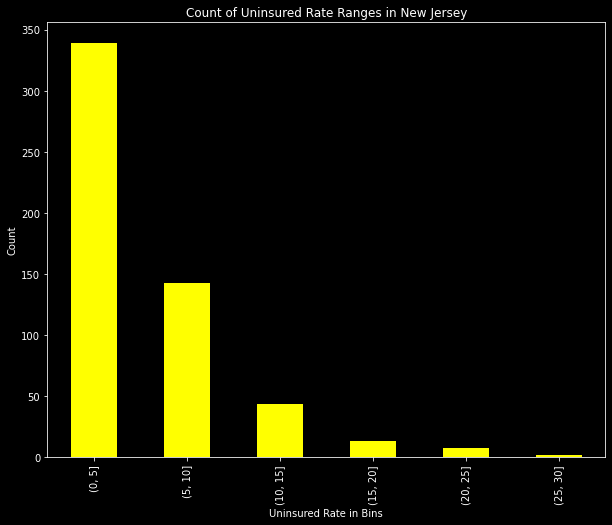

In [74]:
# 2 Histogram

df2 =df

df2['Uninsured Rate'] = df2['Uninsured Population'] / df2['City Population']

df2['Uninsured Rate'] = df2['Uninsured Rate'] *100

df2 = df2.round(decimals=0)

import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import pandas as pd

bins = [0, 5, 10, 15, 20, 25, 30]

plt.style.use('dark_background')

fig_2 = df2.groupby(pd.cut(df2['Uninsured Rate'], bins=bins))['Uninsured Rate'].count()
fig_2.plot(kind='bar', figsize = (10,8), facecolor= 'yellow')

# Add title and axis names
plt.title('Count of Uninsured Rate Ranges in New Jersey')
plt.xlabel('Uninsured Rate in Bins')
plt.ylabel('Count');



In [86]:
# 3 Treemap

# Here I set the colors I will be using for the visualizations
colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}


# Here I set the colors I will be using for the visualizations
colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

df3= cities[['NUI, White', 'NUI, African American','NUI, American Indian & Alaska Native Population',
'NUI, Asians','NUI, Native Hawaiians & Pacific Islanders Population', 'NUI, Other Races','Uninsured Population']]

df3.rename(columns={"NUI, American Indian & Alaska Native Population": "NUI, American Indian &\n Alaska Native", "NUI, Native Hawaiians & Pacific Islanders Population": "NUI, Native Hawaiians &\n Pacific Islanders"}, inplace = True)

df3 = df3[['NUI, White', 'NUI, African American','NUI, American Indian &\n Alaska Native',
'NUI, Asians','NUI, Native Hawaiians &\n Pacific Islanders', 'NUI, Other Races']].sum()

df3 = pd.DataFrame(df3)

df3 = df3.reset_index()

# Didnt use an equals sign because this just renames the existing dataframe instead of renaming a copy of the dataframe.
df3.rename(columns = {'index':'Race', 0:'Number Of Uninsured'}, inplace = True)

df3 = df3.sort_values(by='Number Of Uninsured', ascending =False)

# fig_3 = px.treemap(df3, path=['Race'], values='Number Of Uninsured')

fig_3 = px.treemap(df3, path=['Race'],
                 values='Number Of Uninsured',
                 color='Number Of Uninsured')

fig_3.update_traces(root_color="black")
fig_3.data[0]['textfont']['color'] = colors['text']
fig_3.data[0].hovertemplate = '%{label}<br>%{value}'
fig_3.update_layout(
    title= "Number Of Uninsured By Race in New Jersey"
)

# this is where I center the title for the visualization
fig_3.update_layout(
    height = 700, width = 900,
    title=dict(x=0.5), #set title in the center
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text'],
)



C:\Users\Luis\AppData\Local\Temp\ipykernel_13288\4094274395.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\Luis\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [87]:
# 4 Horizontal Bar

# Here I set the colors I will be using for the visualizations
colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

df5= cities[['NUI, White', 'NUI, African American','NUI, American Indian & Alaska Native Population',
'NUI, Asians','NUI, Native Hawaiians & Pacific Islanders Population', 'NUI, Other Races','Uninsured Population']]

df5.rename(columns={"NUI, American Indian & Alaska Native Population": "NUI, American Indian &\n Alaska Native", "NUI, Native Hawaiians & Pacific Islanders Population": "NUI, Native Hawaiians &\n Pacific Islanders"}, inplace = True)

df5 = df5[['NUI, White', 'NUI, African American','NUI, American Indian &\n Alaska Native',
'NUI, Asians','NUI, Native Hawaiians &\n Pacific Islanders', 'NUI, Other Races']].sum()

df5 = pd.DataFrame(df5)

df5 = df5.reset_index()

# Didnt use an equals sign because this just renames the existing dataframe instead of renaming a copy of the dataframe.
df5.rename(columns = {'index':'Race', 0:'Number Of Uninsured'}, inplace = True)

df5 = df5.sort_values(by='Number Of Uninsured', ascending =True)

fig_5 = px.bar(df5, x='Number Of Uninsured', y='Race',color_discrete_sequence=["blue"], title='Number Of Uninsured By Race For New Jersey', height = 500, width = 700, orientation= 'h')
# fig_3.update_layout(width= 1150, height=700)
# fig_3.show()

# this is where I center the title for the visualization
fig_5.update_layout(
    title=dict(x=0.7), #set title in the center
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color=colors['text'],
)

fig_5.show()


C:\Users\Luis\AppData\Local\Temp\ipykernel_13288\780398220.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
# 5 Scatterplot

In [121]:
# 6 Donut Chart

df6 = df

df6['Unemployment Rate'] = df6['Unemployment Rate (16 & Over)'] / 100.

df6['Employment Rate'] = 1 - df6['Unemployment Rate']

df6['Number Of Employed'] = df6['Uninsured Population'] * df6['Employment Rate']

df6['Number Of Unemployed'] = df6['Uninsured Population'] * df6['Unemployment Rate']

df6 = df6[['Number Of Employed','Number Of Unemployed']]

df6 = df6.round()

df6 = df6.astype(int)

df6 = df6.T

df6 = df6.sum(axis=1)

df6 = pd.DataFrame(df6)

df6 = df6.reset_index()

df6.rename(columns={'index': 'Employment Status', 0: 'Total'}, inplace = True)


colors = ['lime','orange']
fig_6 = go.Figure(data = go.Pie(values = df6['Total'], 
                        labels = df6['Employment Status'], hole = 0.6,
                        marker_colors = colors,
                ))
fig_6.update_traces(
                title_font=dict(size=30,family='Verdana', 
                                color='white'),
                                hoverinfo='label+percent',
                                textinfo='percent', 
                                textfont_size=20,
                )

fig_6.update_layout(legend=dict(y=1.1, x = 0.8), width = 550, height = 400, title = 'Employed/Unemployed Population in New Jersey',
paper_bgcolor = "black", font = {'color': "white", 'family': "Arial"})
fig_6.update_layout(title=dict(x=0.5), title_font=dict(size= 15)) #set title in the center)


In [39]:
# 7 Pie chart

# Here I set the colors I will be using for the visualizations
colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

df7= cities[['NUI, Men', 'NUI, Women']]

df7 = df7[['NUI, Men', 'NUI, Women']].sum()

df7 = pd.DataFrame(df7)

df7 = df7.reset_index()

# Didnt use an equals sign because this just renames the existing dataframe instead of renaming a copy of the dataframe.
df7.rename(columns = {'index':'Gender', 0:'Number Of Uninsured'}, inplace = True)

fig_7 = px.pie(df7, values='Number Of Uninsured', names='Gender', color_discrete_sequence=['cyan','purple'])

fig_7.update_layout(
    title='Number Of Uninsured by Gender in New Jersey'
)

# this is where I center the title for the visualization
fig_7.update_layout(
    title=dict(x=0.5), #set title in the center
    plot_bgcolor=colors['background'],
    paper_bgcolor=colors['background'],
    font_color='white',
    height = 500,
    width = 700
)

fig_7.show()



In [51]:
# 8 Heatmap

